In [34]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
import random

Text(0.5, 1.0, 'data.npz unpacked')

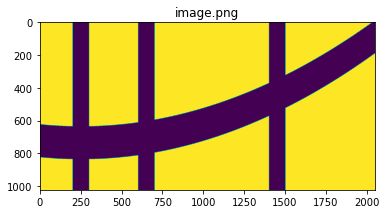

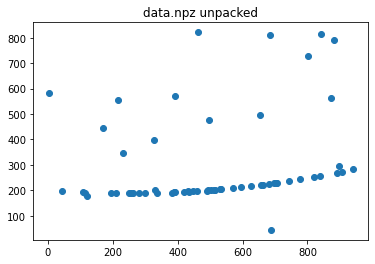

In [94]:
# Loading and seeing data

# image.png being read and shown
image = imread("image.png")
#image = image.astype("bool")
plt.figure()
plt.imshow(image)
plt.title("image.png")

#
with np.load("data.npz") as data:
    X = data["X"]
    Y = data["Y"]
    
plt.figure()
plt.scatter(X,Y)
plt.title("data.npz unpacked")

In [307]:
def err_alsoinliers(bettermodel, x, y):
    
    error = []
    for i in range(len(x)):
        y_hat = bettermodel[0]*(x[i]**2) + bettermodel[1]*(x[i]) + bettermodel[2]
        error.append(abs( y_hat - y ))
    final = np.mean(error)
        
    return final

In [314]:
def ransac_polyfit(x, y, n=20, n_iter=100, t=5, d=1000):
    
    bestFit=None
    bestFit_assigned = False
    bestError=1e10
    lastInliers = []
    alsoInliers = []
    for niter in range(n_iter):
        # executing this loop n_inter times
        if niter == 0:
            maybeInliers = []
        else:
            maybeInliers = lastInliers
            # this allows me to get only points that were inliers in the previous model
            
        
        for ind in np.random.randint(low=0, high=len(X), size=20):
            # for every index selected in the random samples
            maybeInliers.append([X[ind], Y[ind]])
            
        maybeInliers = np.array(maybeInliers)
        # np array cast just for easier manipulating
        
        maybeModel = np.polyfit(maybeInliers[:,0], maybeInliers[:,1], deg=2)
       
        if not(bestFit_assigned):
            bestFit=maybeModel
            # will run on first iteration only as the first model is better than None
            
        for i in range(len(x)):
            if abs(y[i] - np.polyval(p=bestFit, x=x[i])) <= t:
                # if absolute error is smaller than threshold, appends data point to Inliers
                alsoInliers.append([x[i], y[i]])  
        #print("AI",alsoInliers)
                
                
        x_inlier = []
        y_inlier = []
        for el in alsoInliers:
            #print(el)
            x_inlier.append(el[0])
            y_inlier.append(el[1])
            
        try:
            maybeError = err_alsoinliers(maybeModel, x_inlier,y_inlier)
        except:
            continue
        if maybeError < bestError:
            bestFit = maybeModel
            bestError = maybeError
            lastInliers = alsoInliers
            
    return bestFit, bestError, lastInliers

In [315]:
bestFit, bestError, lastInliers = ransac_polyfit(X, Y, n=20, n_iter=100, t=5, d=10)

In [317]:
print(bestFit)
print(bestError)

[ 6.54412098e-04 -4.78317405e-01  3.35377170e+02]
16.26164373992208
